In [1]:
#Description: This program predicts if a passenger will survive on the titanic

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load the data
titanic = sns.load_dataset('titanic')
#Print the row
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
#count the number of rows and columns in the data set
titanic.shape

(891, 15)

In [5]:
#ANALYSING DATA

In [6]:
#Get some statistics
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Get the count of the number of surviver [0: Died , 1: Alive]
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


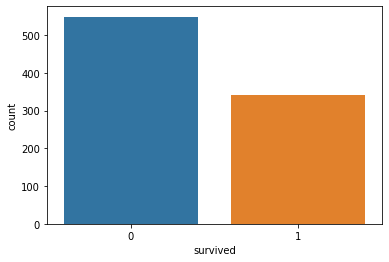

In [8]:
#Visualize the count of survivors [0: Died, 1: Alive]
sns.countplot(titanic['survived'])

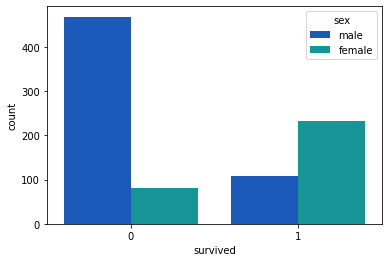

In [9]:
# 0 : Died & 1 : Alive
sns.countplot(x='survived' , hue='sex' , data = titanic, palette = 'winter')

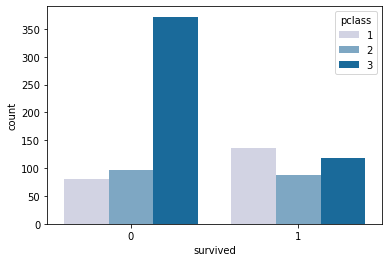

In [10]:
sns.countplot(x='survived' , hue='pclass' , data = titanic, palette = 'PuBu')

In [11]:
#Analysis : the passangers who did not survived belong to the 3rd class. 1st class passangers are most likely to survived.

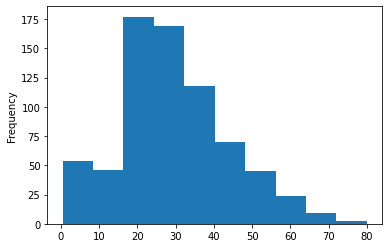

In [12]:
titanic['age'].plot.hist()

In [13]:
#Analysis: we notice that highest age group travelling are among the young age between 20-40. Very few passangers in age group 70-80

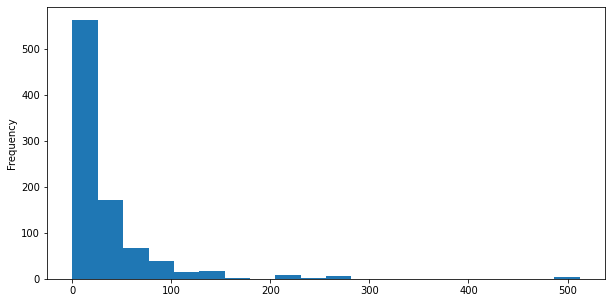

In [14]:
titanic['fare'].plot.hist(bins = 20, figsize = (10,5))

In [15]:
#Analysis : We observed that most of the ticket bought are under fare 100 and very few are on the highest side fare i.e., 220-500 range

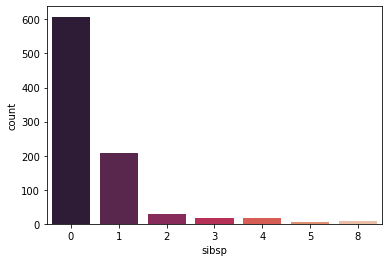

In [16]:
sns.countplot(x='sibsp' , data = titanic, palette = 'rocket')

In [17]:
#Analysis : we notice that the most of the parent don't have siblings aboards.

In [18]:
#Finding the null values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

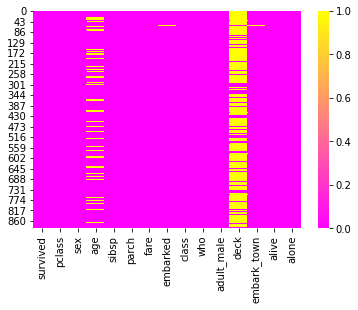

In [19]:
sns.heatmap(titanic.isnull(), cmap = 'spring')

In [20]:
#Yellow lines shoes the null values

In [21]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
titanic.drop('deck', axis=1, inplace = True) #Remove the deck column

In [23]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [24]:
titanic.dropna(inplace = True)

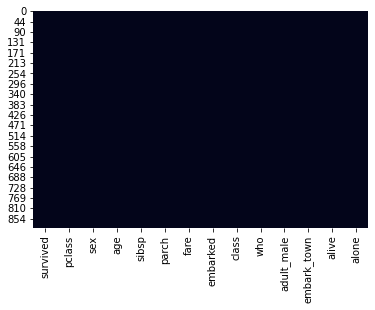

In [25]:
sns.heatmap(titanic.isnull(),cbar = False)

In [26]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [27]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False


In [28]:
#convert the columns (strings) into categorial data to apply logistic regression
pd.get_dummies(titanic['sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [29]:
#drop the first columns [0 : Female, 1 : Male]
sex = pd.get_dummies(titanic['sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [30]:
#convert the columns (strings) into categorial data to apply logistic regression
embark = pd.get_dummies(titanic['embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [31]:
#convert the columns (strings) into categorial data to apply logistic regression
pcl = pd.get_dummies(titanic['pclass'], drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [32]:
titanic = pd.concat([titanic,sex,embark,pcl], axis = 1)

In [33]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,C,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,0,0,1,0,1


In [34]:
#deleting the unwanted columns
titanic.drop(['pclass','sex','embarked','class','who','adult_male','embark_town','alive','alone'], axis=1, inplace=True)

In [35]:
titanic.head()

,survived,age,sibsp,parch,fare,male,C,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,1


In [36]:
#TRAIN DATA

In [37]:
x = titanic.drop('survived',axis = 1)
y = titanic['survived']

In [51]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state= 4)

In [40]:
#LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [42]:
lm.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_prediction = lm.predict(x_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
from sklearn.metrics import classification_report

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test, y_prediction)

array([[126,  19],
       [ 30,  60]])

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test, y_prediction)

0.7914893617021277